In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-03 12:17:03.582291: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 12:17:03.614831: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 12:17:04.091526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################




df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/André - RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')
df_Cam_branco_art = pd.DataFrame(df[['Ano','Cam_branco_art']])

dados = df_Cam_branco_art.replace(0,np.nan).dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1990,1991,1992,1993,1994,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Cam_branco_art'].values
dados.head()

,Ano,Cam_branco_art
0,1950,193.465917
1,1951,187.597779
2,1952,181.320627
3,1953,166.224930
4,1954,153.166412


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [9]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/500


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6632  
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7966 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8789 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7379 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9534 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7136 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0453 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9517 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8155 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9066 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7598 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6479 
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8172 
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8915 
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5442 
Epoch 16/500
3/3 ━━━━━━━━━━━━━

In [6]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/pesos pesca art/.weights.h5')

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7b249c1e9bd0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[120.17844 ]
 [ 78.217804]
 [ 44.019836]
 [ 31.21576 ]
 [ 38.37149 ]
 [ 76.52402 ]]


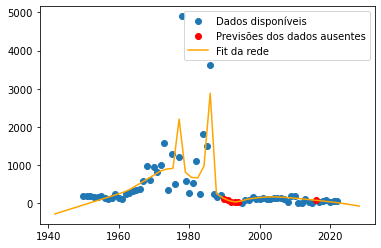

In [10]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

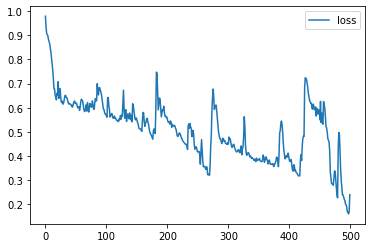

In [11]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [12]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Cam_branco_art':prev_ausentes.flatten()})


df_previsoes.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/Interpolação Cam_branco_art.xlsx')

df_previsoes

,Ano,Cam_branco_art
0,1990,120.178436
1,1991,78.217804
2,1992,44.019836
3,1993,31.215759
4,1994,38.371490
5,2016,76.524017
